In [1]:
# https://github.com/jupyter/notebook/issues/3523
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

In [2]:
%matplotlib inline


# Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


In [4]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [5]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

### We are making three datasets here: the concentric circles, the moons and the linearly separable ones.
The respective functions for making these datasets are built in to sklearn.

In [8]:

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

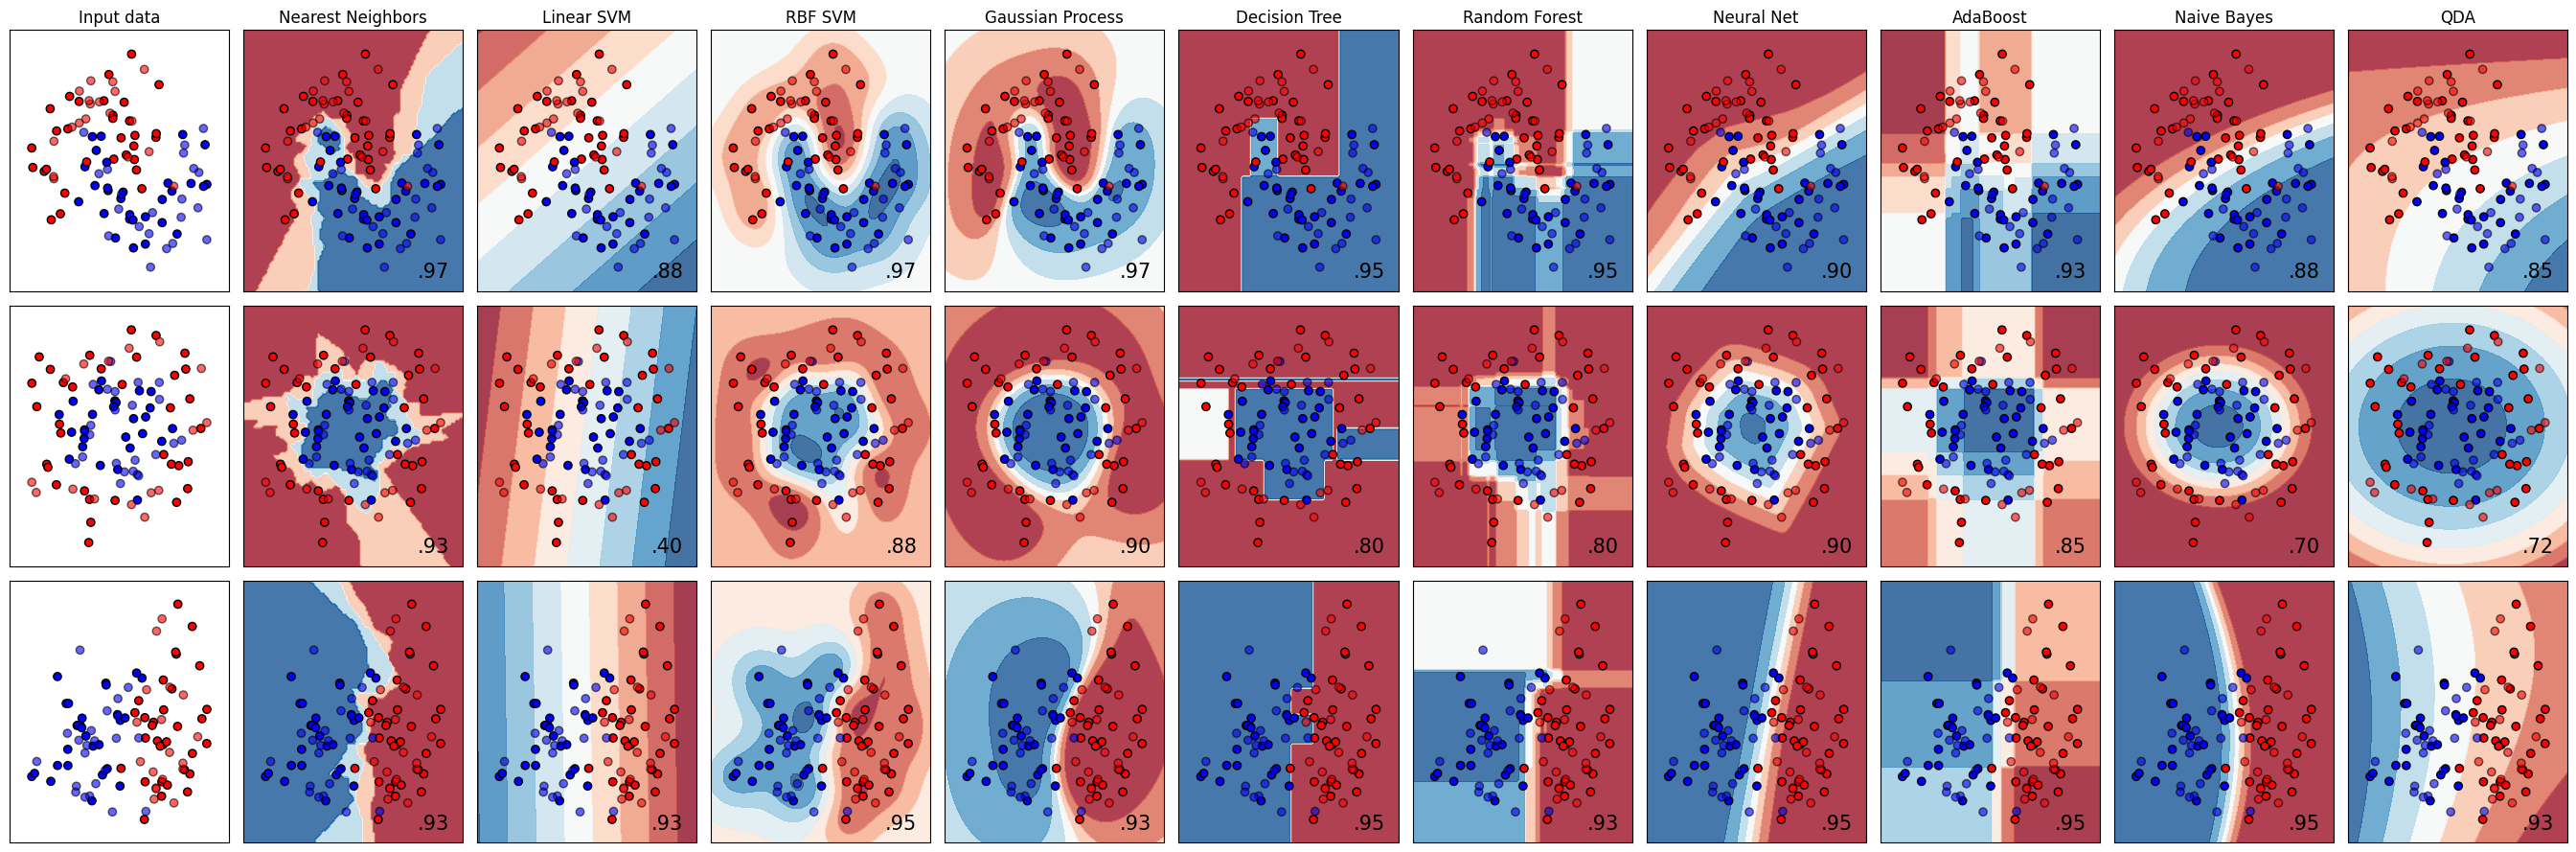

In [9]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

### Look at the classification of both training and test samples

# Classifier Characteristics and Parameters

### Nearest Neighbors:
#### Hyperparameter: n_neighbors (k) - The number of neighbors to consider.
#### Effect: Smaller k values lead to more complex decision boundaries and higher sensitivity to noise, potentially overfitting. Larger k values smooth the decision boundary but may underfit if k is too large.

This method classifies a data point based on the majority class among its k-nearest neighbors in the feature space.  Its performance depends heavily on the choice of k and the data's inherent structure.  On datasets with clear clusters, it can perform well, as seen in some cases here. However, it can struggle with complex decision boundaries or noisy data.

### Linear SVM:
#### Hyperparameters: C - Regularization parameter.
#### Effect: C controls the trade-off between maximizing the margin and minimizing the classification error. Smaller C values create a wider margin but may misclassify more points, while larger C values prioritize correct classification, potentially leading to a narrower margin and overfitting.

Seeks an optimal hyperplane to separate data points of different classes.  It's effective when classes are linearly separable.  Its performance is generally good for linearly separable datasets, as seen in the linearly separable dataset.  However, it fails when classes are not linearly separable.

### RBF SVM:
#### Hyperparameters: C - Regularization parameter (same effect as Linear SVM), gamma - Kernel coefficient.
#### Effect: Gamma defines how much influence a single training example has. A small gamma means a large influence, leading to a smooth decision boundary, while a large gamma results in a more complex boundary, potentially overfitting

Uses a radial basis function kernel to map data to a higher-dimensional space where it might be linearly separable.  This allows it to model non-linear decision boundaries. Its performance is generally good at capturing non-linear relationships but is sensitive to hyperparameter tuning (gamma and C).  Good performance on the moons and circles datasets suggests its ability to handle non-linearity.


### Gaussian Process:
#### Hyperparameters: Kernel - Defines the covariance function between data points. Here RBF kernel is used.
#### Effect: The choice of kernel significantly affects the decision boundary. RBF kernel is suitable for smooth boundaries, but other kernels might be better for different types of data. The parameter 1.0 scales the RBF kernel.

Models the joint probability distribution of the target variable. It can be computationally intensive, but it provides uncertainty estimates along with classifications. Its performance varies depending on the kernel used, with the RBF kernel used here being suitable for smooth decision boundaries. Its performance in the example suggests it could capture the underlying data relationships well.

### Decision Tree:
#### Hyperparameter: max_depth - The maximum depth of the tree.
#### Effect: Controls the complexity of the tree. A deeper tree can capture more complex relationships but may overfit. A shallow tree simplifies the model, potentially underfitting.

Creates a tree-like structure to classify data based on a series of decisions.  It can capture non-linear relationships but is prone to overfitting if not pruned properly. Its performance is reasonable, particularly with a limited `max_depth` to prevent overfitting. Decision trees perform reasonably well because of their ability to represent non-linear decisions.

### Random Forest:
#### Hyperparameters: max_depth (same as Decision Tree), n_estimators - Number of trees, max_features - Number of features to consider when looking for the best split.
#### Effect: n_estimators increases the robustness of the model, reducing variance.  max_features controls the randomness of each tree.  max_depth prevents overfitting of individual trees.

An ensemble of decision trees. By combining multiple decision trees, it reduces overfitting and improves generalization.  It typically performs well with datasets having complex relationships. Its performance is influenced by the number of trees and other hyperparameters. The good performance suggests effective reduction of variance in comparison to single decision trees.

### Neural Net (MLP):
#### Hyperparameters: alpha - L2 penalty (regularization term), max_iter - Maximum number of iterations.
#### Effect: Alpha penalizes large weights, preventing overfitting. max_iter controls the training time; insufficient iterations may lead to underfitting.  Other significant hyperparameters (not explicitly set here) include hidden_layer_sizes, activation function, solver, etc.

A multi-layered perceptron which is a type of feedforward artificial neural network. This uses a set of interconnected nodes where each connection has a weight associated with it. It can learn complex decision boundaries but can also be prone to overfitting and requires careful tuning.  Its performance is highly dependent on proper hyperparameter tuning (alpha, iterations, hidden layers, nodes, etc.)


### AdaBoost:
#### Hyperparameters:  (Implicitly uses defaults) Typically, the number of estimators and the learning rate are important hyperparameters, influencing the model's complexity and convergence.
#### Effect: The number of estimators controls the complexity, while the learning rate determines the contribution of each weak learner.

An ensemble method that combines multiple weak classifiers to form a strong classifier. It focuses on misclassified data points in each iteration. Its performance relies on the base estimator and the number of estimators. It has performed well on a variety of datasets in this analysis.

### Naive Bayes:
#### Hyperparameters:  This classifier doesn't have hyperparameters that are typically tuned. Its performance depends primarily on the validity of the feature independence assumption.

Applies Bayes' theorem to classify data points, assuming feature independence. While a strong assumption, it can still be surprisingly effective. It usually does well on high dimensional data, however its performance is sensitive to the validity of the feature independence assumption.  It might perform better on higher-dimensional datasets than on the examples provided.

### QDA (Quadratic Discriminant Analysis):
#### Hyperparameters:  No explicit hyperparameters were set. The model's performance is sensitive to the validity of the underlying assumptions, particularly related to the quadratic nature of its decision boundaries.

Similar to LDA (Linear Discriminant Analysis), but models class-conditional densities using quadratic functions. It is suited to data with non-linear class boundaries. Its performance is often sensitive to the underlying assumptions, making it suitable for specific kinds of non-linear relationships.  It is more flexible than LDA, but this flexibility might also cause overfitting if the model's assumptions are not met.

Reference: https://scikit-learn.org